# S&P 500 Day Trading Analysis

The main objective of this notebook is to analyze the historical distribution of returns of the S&P500. I want to have an idea of how reliable this distribution is to make predictions on the behavior of the S&P. The goal of a trader is to generate money given a risk-return profile during the period. My assumption in this analysis is to buy at the open and sell at the close; so I am looking to know if a trader can make money using this strategy. This assumption could be modified using intraday or longer periods.

First, let's import the necessary libraries to make the analysis.

__note:__ Some libraries might not be pre-installed so the reader will need to uncomment the line code to install them.

In [1]:
#pip install yfinance
#pip install plotly
#pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from scipy.stats import norm as norm

%matplotlib inline

I am going to use the yfinance library to get access to the daily price information of the S&P500. I am looking to a large data set to have a more accurate result of the distribution, so I am going to download historical price information since January 1, 1970. 

In [2]:
GSPC = yf.Ticker('^GSPC')

hist = GSPC.history(period='1d', start='1970-01-01')

print(hist.head())

             Open   High    Low  Close    Volume  Dividends  Stock Splits
Date                                                                     
1970-01-02  92.06  93.54  91.79  93.00   8050000          0             0
1970-01-05  93.00  94.25  92.53  93.46  11490000          0             0
1970-01-06  93.46  93.81  92.13  92.82  11460000          0             0
1970-01-07  92.82  93.38  91.93  92.63  10010000          0             0
1970-01-08  92.63  93.47  91.99  92.68  10670000          0             0


Let's take a look to a graphic representation of the series, plotting the close price:

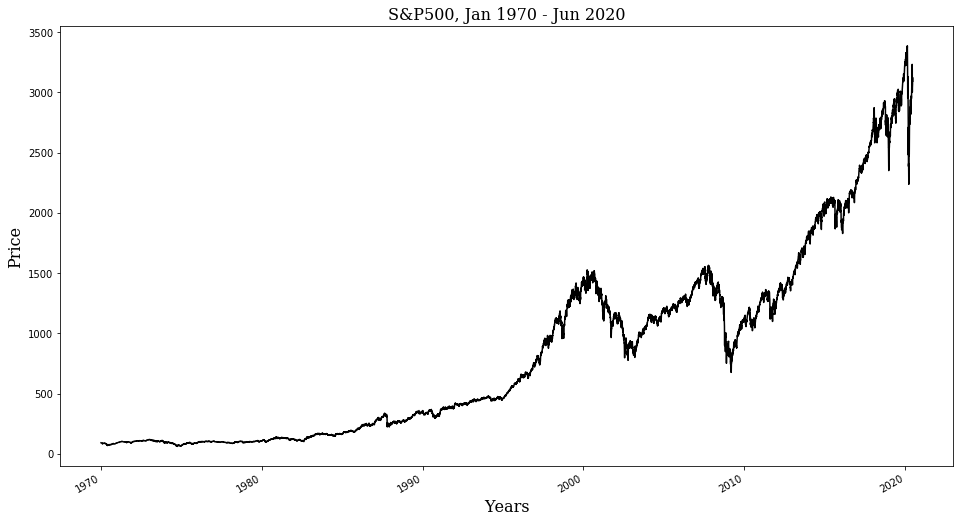

In [3]:
hist['Close'].plot(color='k',figsize=(16,9))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.title("S&P500, Jan 1970 - Jun 2020",fontdict=font)
plt.ylabel("Price",fontdict=font)
plt.xlabel("Years",fontdict=font)
plt.show()

Let's take a look at the data type of the variables to make sure that they are in the right type.

In [4]:
hist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

For the analysis, I am interested in Open and Close data; both are float type so there is no need to cast any variable. Let's have a separate data frame for these two variables only. 

In [5]:
GSPC = hist[['Open','Close']]
GSPC

,Open,Close
Date,,
1970-01-02,92.06,93.00
1970-01-05,93.00,93.46
1970-01-06,93.46,92.82
1970-01-07,92.82,92.63
1970-01-08,92.63,92.68
...,...,...
2020-06-15,2993.76,3066.59
2020-06-16,3131.00,3124.74
2020-06-17,3136.13,3113.49


Also, let's check that there is no missing data on the series.

In [6]:
print(GSPC.isnull().sum())

Open     0
Close    0
dtype: int64


Once the data looks in good shape, I will create a histogram of the daily return. 

First, let's define the return variable as:

$$ R = {(\frac {Close}{Open}-1)*100}$$



In [7]:
GSPC['Return'] = (GSPC['Close']/GSPC['Open']-1)*100
GSPC.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,Close,Return
Date,,,
1970-01-02,92.06,93.00,1.021073
1970-01-05,93.00,93.46,0.494624
1970-01-06,93.46,92.82,-0.684785
1970-01-07,92.82,92.63,-0.204697
1970-01-08,92.63,92.68,0.053978


Now, the data is ready to plot it in a histogram where the X-axis represents the range of returns and the Y-axis represents the number of trading days corresponding to each bin or frequency. 

As mentioned, each bin in the X-axis represents a range between the lower value and the upper value, e.g., about 1,500 trading days, the S&P500 had a return between -1.0% and -0.5%.

I plotted a normal distribution on the secondary axis to have a graphical idea of how good the distribution of returns fits the bell graph. 

In [1]:
bin_list = [i for i in np.arange(-4,4.5,0.5)]
count, bin_list = np.histogram(GSPC['Return'], bins = bin_list)
xmin = bin_list[0] -0.5
xmax = bin_list[-1]  +0.5

fig = plt.figure()

ax1 = fig.add_subplot()
ax1 = GSPC['Return'].plot(kind='hist',
          figsize=(, 6), 
          bins=bin_list,
          xticks=bin_list,
          color=['lightblue', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )
ax1.set_ylabel('Frequency')

x_axis = np.arange(-4,4.5,0.5)
ax2 = ax1.twinx()
ax2 = plt.plot(x_axis, norm.pdf(x_axis,0,1), color='red')
ax2 = plt.ylim([0,0.43])

plt.title('Histogram of Daily Return')
plt.xlabel('Average Daily Range') 

plt.show()

NameError: name 'np' is not defined

As noted in the graph, the shape of the distribution is more peaked than the normal distribution which might indicate that the distribution is skewed. In case the distribution is skewed, this will imply that there are more extreme movements in the tail of the distribution.To determine this, I will run some descriptive statistics from the data.

In [9]:
GSPC['Return'].describe()

count    12731.000000
mean         0.030967
std          1.026911
min        -20.466926
25%         -0.446905
50%          0.043262
75%          0.523471
max         10.789002
Name: Return, dtype: float64

Running the <code>describe</code> method show us a first insight on some important descriptive statistics. The average daily return on the S&P500 is 0.03% in 50 years and this represents the return that we can expect to make if we buy in the open and we sell in the close. 

The minimum return reported is a loss of 20.47% in a day trading and the maximum return is a gain of 10.79%. The 25th percentile has a loss of -0.44% or lower and the 75th percentile has a return of 0.52% or lower. The median (or the 50th percentile) is 0.04% which is greater than the mean; this indicates that negative returns are higher in magnitude than positive returns.

Interesting to notice that 75% of the time the return was equal or less than 0.52%. Contrasting this with the maximum return of 10.79%, it is noticeable the gap in between. 

Calculating the skewness and kurtosis to determine whether the data is symmetric:

In [10]:
print(f"kurtosis\t%.4f" %GSPC['Return'].kurtosis())
print(f"skewness\t%.4f" %GSPC['Return'].skew())

kurtosis	19.9145
skewness	-0.6942


The kurtosis is positive and is considerably high which means that the distribution has 'fatter tails' and proves that the distribution is not normal and that there is more volatility in extreme values. The skewness is negative but less than greater than -1 which is not that bad and only suggests that negative returns are more extreme than positive returns and probably occur more often as well. 

To demonstrate that last part, I will calculate the probability of occurence of each bin and the cumulative probability:

In [11]:
df = pd.DataFrame(count,index=np.arange(-3.5,4.5,0.5))
df.columns = ['Frequency']
df['Probabilities'] = (df['Frequency']/GSPC['Return'].describe()[0])*100
df['Cumulative probabilities'] = df['Probabilities'].cumsum()
print(df)

      Frequency  Probabilities  Cumulative probabilities
-3.5         20       0.157097                  0.157097
-3.0         31       0.243500                  0.400597
-2.5         72       0.565549                  0.966146
-2.0        150       1.178226                  2.144372
-1.5        370       2.906292                  5.050664
-1.0        721       5.663341                 10.714005
-0.5       1565      12.292829                 23.006834
 0.0       3013      23.666640                 46.673474
 0.5       3453      27.122771                 73.796245
 1.0       1814      14.248684                 88.044930
 1.5        806       6.331003                 94.375933
 2.0        354       2.780614                 97.156547
 2.5        161       1.264630                 98.421177
 3.0         68       0.534129                 98.955306
 3.5         34       0.267065                 99.222371
 4.0         21       0.164952                 99.387322


The analysis of the cumulative probability is straight forward. What is important to notice for this analysis is that there is a 46.7% probability that a day trading strategy on the S&P500 will yield a negative return or what is equivalent to say that 53.3% of the time there is going to be a positive return. This means that a day trader will make money on the S&P500 just about half of the time and the other half will lose money. 

I will also define a function that allows me to calculate the average return for only positive values and another function that allows me to calculate the average return for only negative values:

In [12]:
avg_return = GSPC['Return'].mean()

def mean_pos(L):
    pos_only = [x for x in L if x > 0]
    if pos_only:
        return sum(pos_only) /  len(pos_only)

def mean_neg(L):
    neg_only = [x for x in L if x < 0]
    if neg_only:
        return sum(neg_only) /  len(neg_only)

avg_pos = mean_pos(GSPC['Return'])

avg_neg = mean_neg(GSPC['Return'])

print("Average return:\t\t\t %.4f" %avg_return)
print(f"Positive average return:\t %.4f" %avg_pos)
print(f"Negative average return:\t%.4f" %avg_neg)



Average return:			 0.0310
Positive average return:	 0.6924
Negative average return:	-0.7099


As mentioned before, half of the time a day trader on the S&P500 will expect a positive return; this return on average will be 0.69%. The other half of the time the same day trader will have an average loss of 0.71%

Let's calculate what is the expected return based on the probability that particular trading will end with a positive return and the probability that will end with a negative return. To do that, I will define 3 functions each of them will calculate the number of days with positive return only, negative return only, and a flat return.

In [13]:
def count_pos(L):
    count = 0
    for x in L: 
        if x > 0:
            count +=1
    return count

def count_neg(L):
    count = 0
    for x in L: 
        if x < 0:
            count +=1
    return count

def count_zero(L):
    count = 0
    for x in L: 
        if x == 0:
            count +=1
    return count

days_pos = count_pos(GSPC['Return'])

days_neg = count_neg(GSPC['Return'])

days_flat = count_zero(GSPC['Return'])

print(f"Number of trading days with positive return:\t {days_pos}")
print(f"Number of trading days with negative return:\t {days_neg}")
print(f"Number of trading days with flat return:\t {days_flat}")
print("-"*55)
print(f"Total Number of trading days:\t\t\t {days_pos+days_neg+days_flat}")

Number of trading days with positive return:	 6701
Number of trading days with negative return:	 5980
Number of trading days with flat return:	 50
-------------------------------------------------------
Total Number of trading days:			 12731


These results show that in 20 years period 6701 trading days there has been a positive return, 5979 trading days there has been a negative return, and 50 days there hasn't been a return at all.

Let's calculate the frequency as a percentage of the total trading days in the period and estimate the average return.

In [14]:
data = {'Avg Return':[avg_pos,avg_neg],'Frequency':[days_pos,days_neg]}

df = pd.DataFrame(data,columns=['Avg Return','Frequency'],index=['Positive','Negative'])

df['Frequency %'] = round(df['Frequency']/GSPC['Return'].count()*100,2)

df['Expected Return'] = df['Avg Return']*df['Frequency %']/100

df

,Avg Return,Frequency,Frequency %,Expected Return
Positive,0.692361,6701,52.64,0.364459
Negative,-0.709911,5980,46.97,-0.333445


This average expected return can be interpreted as if a trader goes long-only on average the daily positive return (weighted by the frequency) will be 0.36%; similarly, if the trader goes short-only the average expected loss will be 0.33%

Finally, I will analyze the distribution of the average return respect to the standard deviation and compare to the normal distribution to demonstrate that day trading on the S&P500 has more extreme occurrence than in the normal distribution which is a characteristic of a leptokurtosis distribution. 

Let's define a function that creates an interval around the mean based on the standard deviation:

In [15]:
def std_to_mean(data, num_of_std):
    mean = data.mean()
    std = data.std()
    upper = mean + num_of_std*std
    lower = mean - num_of_std*std
    return upper, lower

Once I have the function, I will create 3 sets of intervals. The first one will be one standard deviation from the mean, the second one will be two standard deviations from the mean, and the third one will be three standards deviation from the mean.

In [16]:
upper_limits = []
lower_limits = []
for n in range(1,4):
    upper, lower = std_to_mean(GSPC['Return'],n)
    upper_limits.append(upper)
    lower_limits.append(lower)

print(upper_limits)
print(lower_limits)

[1.0578781396356614, 2.084789169793279, 3.1117001999508975]
[-0.9959439206795748, -2.022854950837193, -3.0497659809948114]


To complete the analysis, I will define a function that filters the returns based on the lower and upper limit return that I have on my lists above:

In [17]:
def count_between(L, lower_limit, upper_limit):
    count = 0
    for x in L: 
        if lower_limit < x < upper_limit:
            count +=1
    return count

Now let's create a table where we summarize the percentage of trading days that returns will lie in the intervals defined above. Additionally, in a normal distribution, 68.2% of the data falls one standard deviation apart from the mean, 95.4% of the data falls two standard deviations apart from the mean, and 99.8% of the distribution falls three standard deviations apart from the mean.

In [18]:
actual = [count_between(GSPC['Return'],lower_limits[n],upper_limits[n]) for n in range(3)]

df = pd.DataFrame(actual,columns=['Actual'],index=['1 std dev','2 std dev', '3 std dev'])

df['Actual %'] = round(df['Actual']/GSPC['Return'].count()*100,1)

df['Actual %'] = df['Actual %'].round(3)

df['Normal %'] = [68.2,95.4,99.8]

df['Normal'] = df['Normal %']*GSPC['Return'].count()/100

df['Normal'] = df['Normal'].astype(int)

df = df[['Actual','Normal','Actual %','Normal %']]

df
    

,Actual,Normal,Actual %,Normal %
1 std dev,9966,8682,78.3,68.2
2 std dev,12132,12145,95.3,95.4
3 std dev,12557,12705,98.6,99.8


The distribution of returns of the S&P500 has less occurence within two and three standard deviations compared with the normal distribution. This means that extreme returns above three standard deviations occur more often than the normal distribution predicts.

__conclusion:__ <p>&nbsp;</p> Day trading on the S&P500 is not the most efficient strategy on a risk-return perspective. The distribution has a leptokurtosis shape which increases the volatility of extreme values and prediction based on a normal-distributed models is not appropriate. 